In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt
# import plotly.express as px

In [2]:
SDB = sqlite3.connect('VarlePigu.db')
C = SDB.cursor()
sql="""select *   from TeleVarle;"""
df = pd.read_sql_query(sql, con=SDB)

SDB.close()

for c in df.columns:
    print(c)

nuoroda
firstInfo
kaina
buvusiKaina
gamintojas
tipas
ekrano įstrižainė
ekrano raiška
smart tv
operacinė sistema
spalva
modelis
tvx08 procesorius
ekrano tipas
vaizdo įrašymo parinktis
garso sistema
svoris su stovu
tvx09 wi-fi
belaidės pelės ir klaviatūros prijungimas
išmanusis nuotolinio valdymo pultas
tvx03 atnaujinimo dažnis
"ambilight"
smart tv technologija
tvx07 operacinė sistema
matmenys su stovu
didelis dinaminis diapazonas (hdr)
matmenys be stovo (pxaxd)
tvx12 usb
tvx10 bluetooth
tvx14 pilno dydžio
išmaniosios televizijos platforma
įtrauktas tvirtinimo elementas
televizijos patarimai
svoris be stovo
energijos suvartojimo klasė
tvx02 ekrano dydis (cm)
micro dimming technologija
tvx11 nuotolinio valdymo pultas
garso galia
ryškumą
energijos sąnaudos (1000 valandų)
valdymas išmaniųjų įrenginių pagalba
wi-fi palaikymas
tvx04 ekrano skiriamoji geba
alternatyvus pavadinimas fi
tvx13 hdmi
man alternatyvos
picture-in-picture
derintuvas
energijos etiketės tipas
svoris
tvx05 mikro pritemdym

In [27]:
SDB = sqlite3.connect('VarlePigu.db')
C = SDB.cursor()
sql="""select kaina,
gamintojas
from TeleVarle;"""
df = pd.read_sql_query(sql, con=SDB)

sql2="""select kaina,
`Prekės ženklas:`
from TelePigu;"""
dfp = pd.read_sql_query(sql2, con=SDB)

SDB.close()
dfp.head()

,kaina,Prekės ženklas:
0,148.0,Xiaomi
1,350.0,Samsung
2,259.0,Xiaomi
3,339.0,Xiaomi
4,146.0,TCL


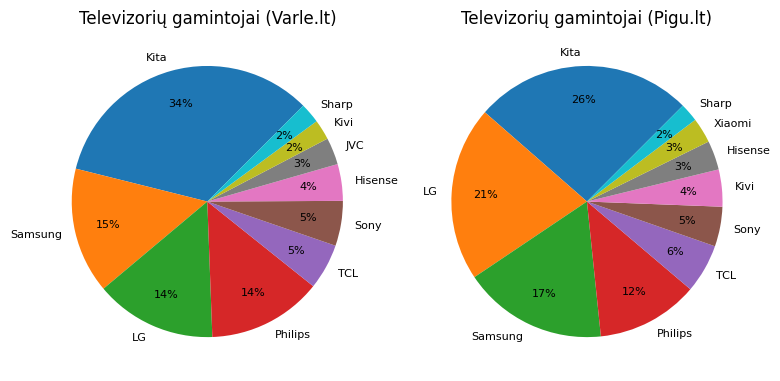

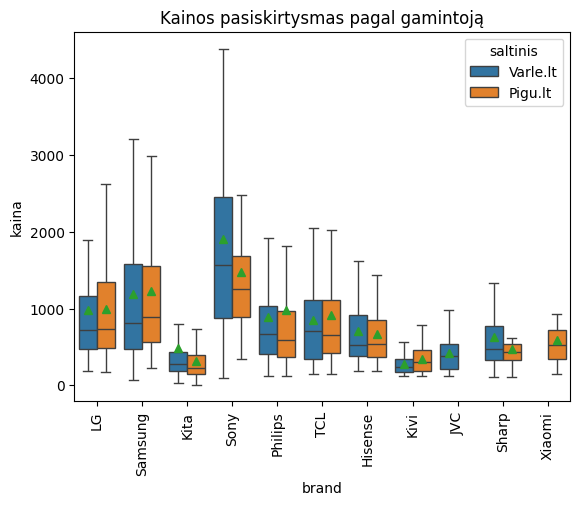

In [32]:
SDB = sqlite3.connect('VarlePigu.db')
C = SDB.cursor()
sql="""select kaina,
gamintojas
from TeleVarle;"""
df = pd.read_sql_query(sql, con=SDB)

sql2="""select kaina,
`Prekės ženklas:`
from TelePigu;"""
dfp = pd.read_sql_query(sql2, con=SDB)

SDB.close()
dfp.head()


dfp['gamintojas'] = dfp['Prekės ženklas:']

top = df['gamintojas'].value_counts().head(9).index.tolist()

df['brand'] = df['gamintojas'].apply(lambda x: x if x in top else 'Kita')
c = df['brand'].value_counts()
df['kaina'] = df['kaina'].str.extract('(\d+)')
df['kaina'] = df['kaina'].apply(lambda x: float(x))

# pigu
top_p = dfp['gamintojas'].value_counts().head(9).index.tolist()

dfp['brand'] = dfp['gamintojas'].apply(lambda x: x if x in top_p else 'Kita')
c_p = dfp['brand'].value_counts()

df['saltinis'] = 'Varle.lt'
dfp['saltinis'] = 'Pigu.lt'

# sujungiam
df_join = df[['kaina', 'brand', 'saltinis']]
dfp_join = dfp[['kaina', 'brand', 'saltinis']]
df_combined = pd.concat([df_join, dfp_join])
# df_combined.dropna(subset='gamintojas', inplace=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))
# ax.pie(c.values, labels=c.index, autopct='%.f%%')
ax1.pie(c.values, 
        labels=c.index, 
        autopct='%.f%%',
        textprops={'fontsize':8, 'color': 'black'},
        startangle=45,
        # move the percentage inside the arcs
        pctdistance=0.75,
        # add spaces between the arcs
        # explode=[0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
        )
ax1.set_title('Televizorių gamintojai (Varle.lt)')

ax2.pie(c_p.values, 
        labels=c_p.index, 
        autopct='%.f%%',
        textprops={'fontsize':8, 'color': 'black'},
        startangle=45,
        # move the percentage inside the arcs
        pctdistance=0.75,
        # add spaces between the arcs
        # explode=[0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
        )
ax2.set_title('Televizorių gamintojai (Pigu.lt)')
plt.tight_layout()
plt.show()

fig, ax = plt.subplots()
sns.boxplot(data=df_combined, x='brand', y='kaina',hue='saltinis', ax=ax, showmeans=True, showfliers=False)
ax.tick_params(axis='x', rotation=90)
ax.set_title('Kainos pasiskirtysmas pagal gamintoją')
plt.show()

In [40]:
 # tele size 
SDB = sqlite3.connect('VarlePigu.db')
C = SDB.cursor()
sql="""select kaina,
gamintojas,
`ekrano įstrižainė`
from TeleVarle;"""
df = pd.read_sql_query(sql, con=SDB)

# sql2="""select kaina,
# `Prekės ženklas:`
# from TelePigu;"""
# dfp = pd.read_sql_query(sql2, con=SDB)

SDB.close()

df.head()

,kaina,gamintojas,ekrano įstrižainė
0,849,LG,55
1,1019,LG,55
2,399,Samsung,127 cm (50 colių)
3,459,Samsung,"140 cm (55"")"
4,1299,LG,65
